# Problem Statement:
**Predict the probability of stroke based on health indicators and demographic data.**

**Description:** Using the dataset containing information such as age, gender, hypertension, heart disease, BMI, smoking status, and other health indicators, the aim is to develop a machine learning model that can predict whether a person is likely to have a stroke or not. The model will utilize historical data to understand patterns and relationships between these factors and stroke occurrences, enabling the identification of risk factors contributing to strokes.

**Objective:** Develop a predictive model that accurately identifies individuals at risk of experiencing a stroke based on their health-related attributes, facilitating early intervention and preventive measures to reduce stroke incidence.


### Importing Libraries and Loading the Data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

### DataFrame Summary with Data Types, Non-Null Counts, and Memory Usage

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Descriptive Statistics for Numerical Columns.

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Exploring Relationships Between Numeric Columns.

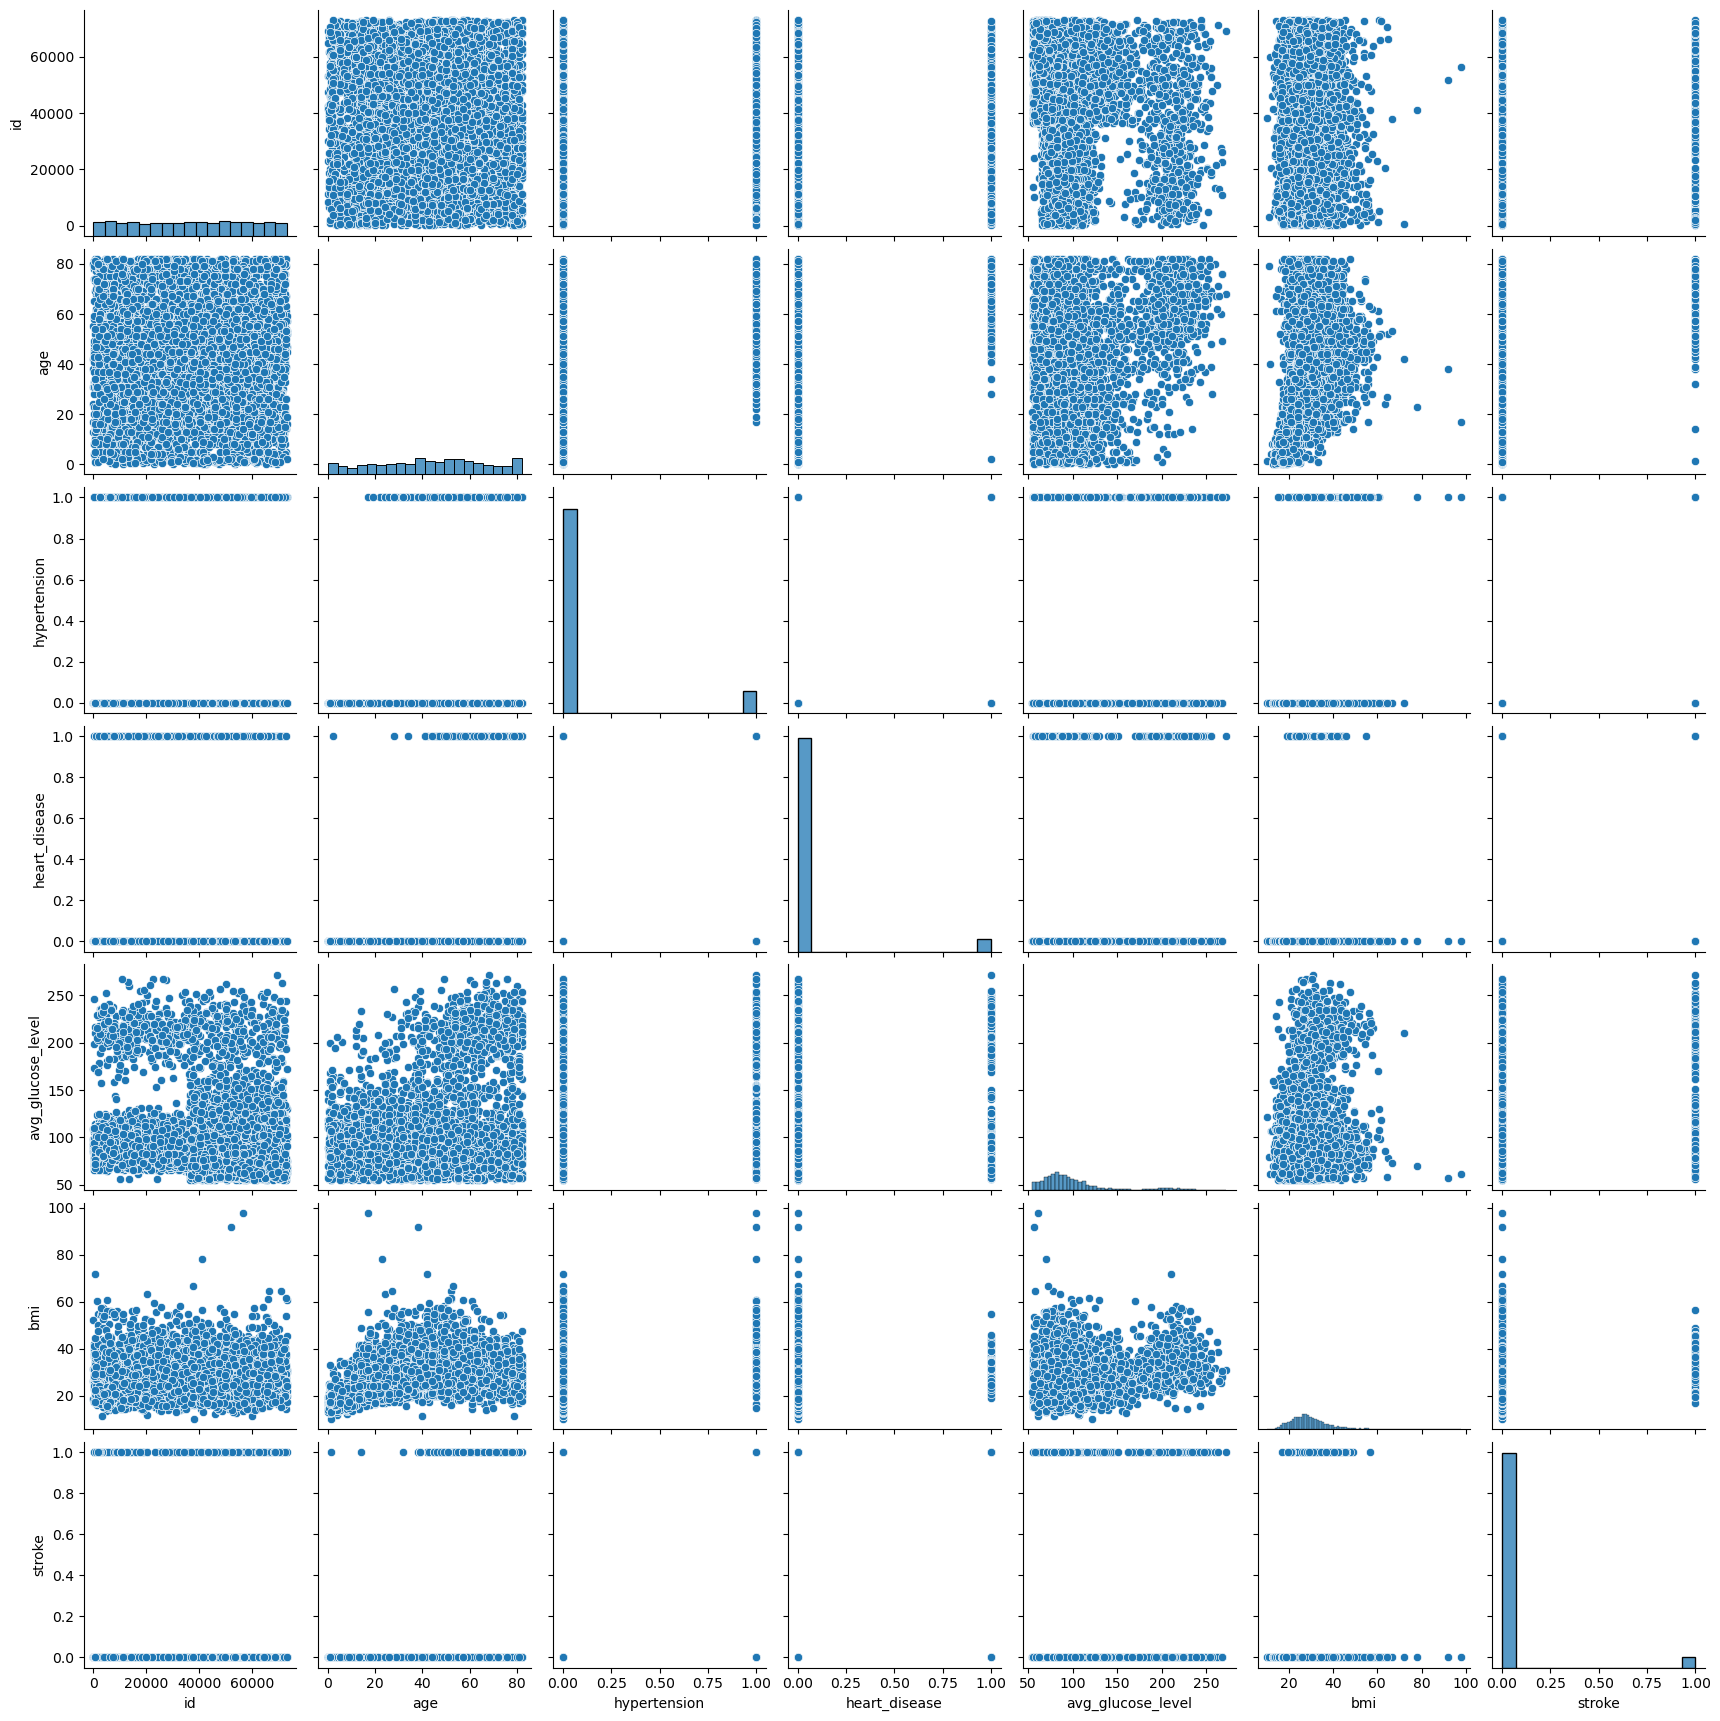

In [8]:
sns.pairplot(df)

In [9]:
dfnumerical=df[['age','avg_glucose_level','bmi']]
dfcategorical=df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14688\1808234495.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dfnumerical,shade=True,palette='RdPu')


Text(0.5, 1.0, 'kde for age, avg_glucose_level and bmi')

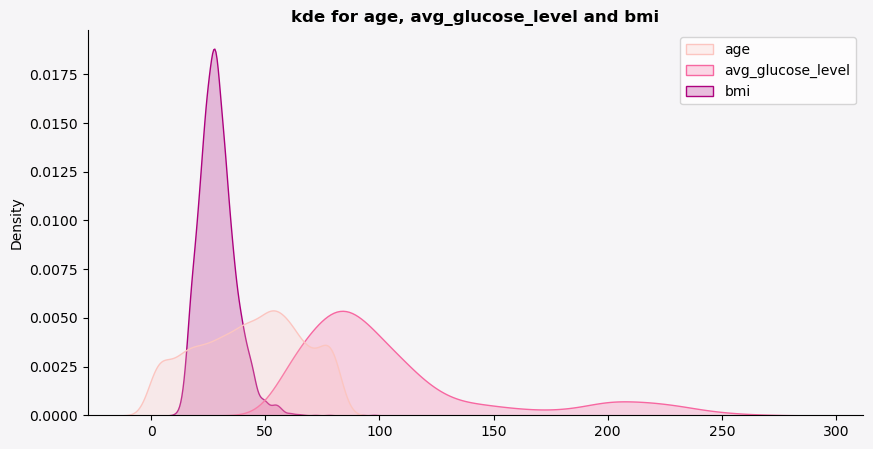

In [10]:
fig,ax=plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f7')
for i in ["top","right"]:
    ax.spines[i].set_visible(False)

sns.kdeplot(data=dfnumerical,shade=True,palette='RdPu')
plt.title("kde for age, avg_glucose_level and bmi",weight='bold')

In [11]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [12]:
pd.crosstab(df.gender,df.work_type)

work_type,Govt_job,Never_worked,Private,Self-employed,children
gender,,,,,
Female,399,11,1754,504,326
Male,258,11,1170,315,361
Other,0,0,1,0,0


In [13]:
pd.crosstab(df.gender,df.ever_married)

ever_married,No,Yes
gender,,
Female,993,2001
Male,763,1352
Other,1,0


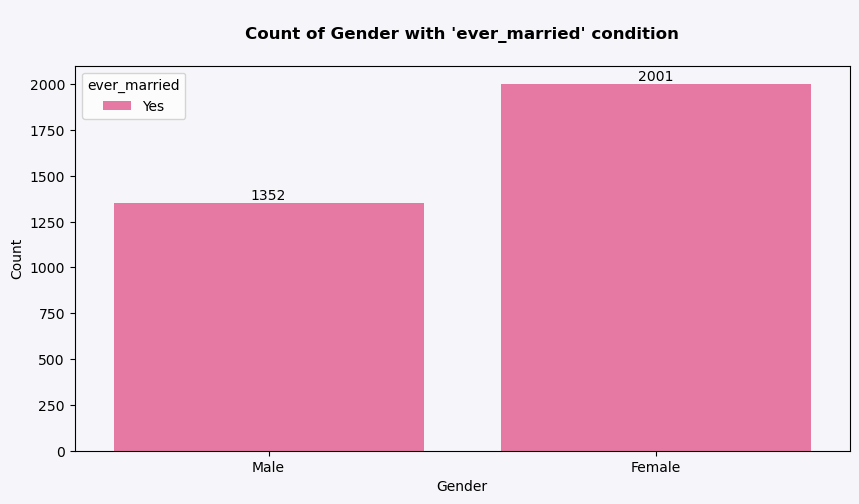

In [15]:
fig,x=plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('#f6f5f9')
x.set_facecolor('#f6f5f9')
j = df[df['ever_married'] == "Yes"]
x=sns.countplot(data=j, x="gender", palette='RdPu', hue='ever_married')
for i in x.containers:
    x.bar_label(i)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("\nCount of Gender with 'ever_married' condition\n",weight="bold")
plt.show()

### Analyzing Correlation Between Data.

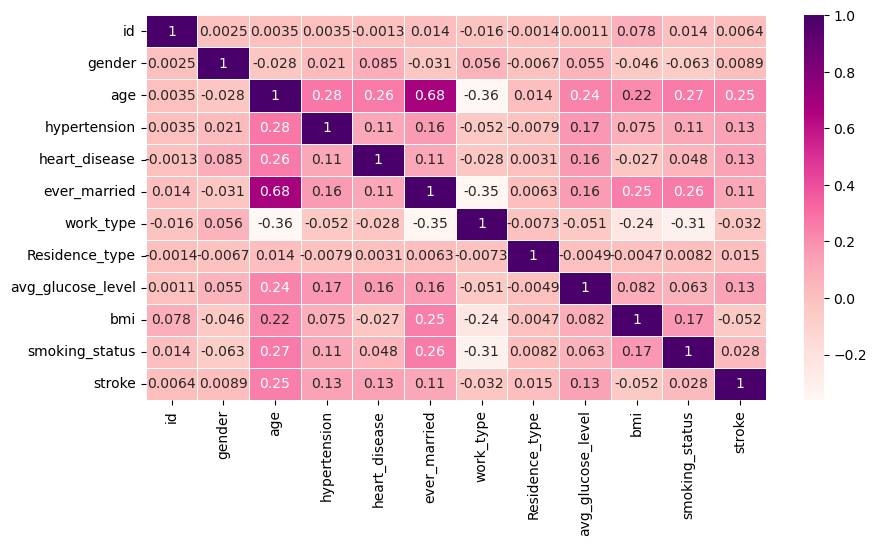

In [38]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='RdPu',annot=True,linewidths=0.5)
plt.show()

In [23]:
null_counts=df.isna().sum()

### Calculating the percentage of null values in each column

In [24]:
total_rows = len(df)
null_percentage = (null_counts / total_rows) * 100
null_percentage

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

### Data Preprocessing: Cleaning and Transforming Raw Data for Analysis.

In [25]:
from sklearn.preprocessing import LabelEncoder
df.fillna(0,inplace=True)
l=LabelEncoder()
df['gender']=l.fit_transform(df['gender'])
df['ever_married']=l.fit_transform(df['ever_married'])
df['work_type']=l.fit_transform(df['work_type'])
df['Residence_type']=l.fit_transform(df['Residence_type'])
df['smoking_status']=l.fit_transform(df['smoking_status'])

In [26]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,0.0,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,0.0,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [27]:
#independent features
x=df.iloc[:,:-1]
x

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1
1,51676,0,61.0,0,0,1,3,0,202.21,0.0,2
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,0.0,2
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1


In [28]:
#dependent features
y=df.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

### Model Selection: Choosing the Optimal Machine Learning Model.

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [30]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    print(f'training accuracy:{train}\nTesting accuracy:{test}')
    print(classification_report(ytest,ypred))
    return model

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [32]:
mymodel(LogisticRegression())

training accuracy:0.9496086105675147
Testing accuracy:0.9354207436399217
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       962
           1       0.20      0.03      0.06        60

    accuracy                           0.94      1022
   macro avg       0.57      0.51      0.51      1022
weighted avg       0.90      0.94      0.91      1022



LogisticRegression()

## Conclusion:

**Successfully developed a predictive model with a high accuracy rate of 94% for identifying individuals at risk of experiencing a stroke.
The deployed model can assist in early detection and proactive intervention strategies to reduce stroke incidence and improve healthcare outcomes.**